In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#read in file
df = pd.read_csv('Chicago-Divvy-2016.csv')
print(df.head())


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
72126,12150369,10/01/2016 01:40,10/01/2016 01:43,1651,233,117,Wilton Ave & Belmont Ave,114,Sheffield Ave & Waveland Ave,Subscriber,Male,1971.0
72127,12150340,10/01/2016 01:21,10/01/2016 01:29,4803,472,123,California Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Female,1991.0
72128,12150249,10/01/2016 00:35,10/01/2016 00:53,3906,1069,90,Millennium Park,197,Michigan Ave & Madison St,Customer,NaN,NaN
72129,12150216,10/01/2016 00:19,10/01/2016 00:44,5882,1492,300,Broadway & Barry Ave,300,Broadway & Barry Ave,Subscriber,Male,1993.0
72130,12150187,10/01/2016 00:09,10/01/2016 00:19,490,624,144,Larrabee St & Webster Ave,152,Lincoln Ave & Diversey Pkwy,Subscriber,Male,1992.0


In [3]:
#check shape and general desription of data
print(df.shape)
print(df.describe())

(72131, 12)
            trip_id        bikeid  tripduration  from_station_id  \
count  7.213100e+04  72131.000000  72131.000000     72131.000000   
mean   1.080197e+07   2966.389472    993.817762       178.197391   
std    1.261951e+06   1674.490919   1970.898086       127.282634   
min    8.547222e+06      1.000000     60.000000         2.000000   
25%    9.730023e+06   1523.000000    408.000000        74.000000   
50%    1.082273e+07   3026.000000    701.000000       157.000000   
75%    1.189510e+07   4381.000000   1174.000000       268.000000   
max    1.297909e+07   5919.000000  86365.000000       620.000000   

       to_station_id     birthyear  
count   72131.000000  54986.000000  
mean      177.351264   1980.423799  
std       127.515457     10.823393  
min         2.000000   1899.000000  
25%        73.000000   1975.000000  
50%       156.000000   1984.000000  
75%       268.000000   1989.000000  
max       620.000000   2000.000000  


In [5]:
# user as old as 117?
df[df['birthyear'] < 1920].count()

df['age'] = 2016-df['birthyear']


In [6]:
#convert tripduration from seconds to minutes
df['tripduration'] = df['tripduration'] / 60

In [7]:
#check for na values
df.isna().sum()

print(df[df['usertype']=='Subscriber'].isna().sum())
print(df[df['usertype']=='Customer'].isna().sum())

print(df[df['usertype']!='Subscriber'].shape)



#Missing birthyear and gender data is almost completely all due to Customer usertypes.



trip_id              0
starttime            0
stoptime             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               9
birthyear            0
age                  0
dtype: int64
trip_id                  0
starttime                0
stoptime                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               17145
birthyear            17145
age                  17145
dtype: int64
(17149, 13)


<AxesSubplot:>

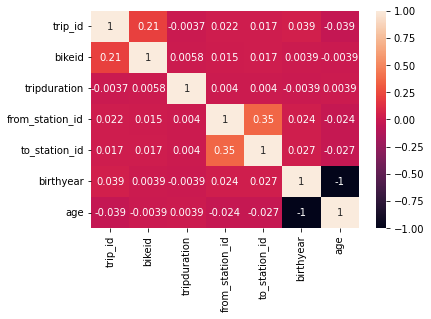

In [8]:
#Check for any correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

count    72131.000000
mean        16.563629
std         32.848301
min          1.000000
25%          6.800000
50%         11.683333
75%         19.566667
max       1439.416667
Name: tripduration, dtype: float64


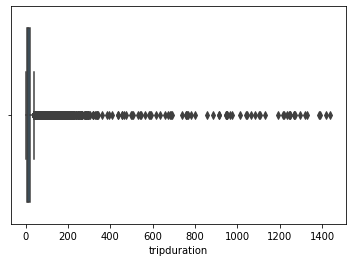

Median trip duration(mins):
 11.683333333333334


In [9]:
print(df['tripduration'].describe())

sns.boxplot(x=df['tripduration'])
plt.show()

print('Median trip duration(mins):\n',df['tripduration'].median())

#We have a few outliers so using the median will reduce the affect these have deciding a more accurate average.

In [10]:
print(df[df['tripduration'] > 300].count())

#78 users had trip durations of 5 hours upto 24 hours


trip_id              78
starttime            78
stoptime             78
bikeid               78
tripduration         78
from_station_id      78
from_station_name    78
to_station_id        78
to_station_name      78
usertype             78
gender               34
birthyear            34
age                  34
dtype: int64

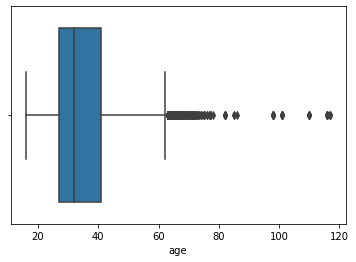

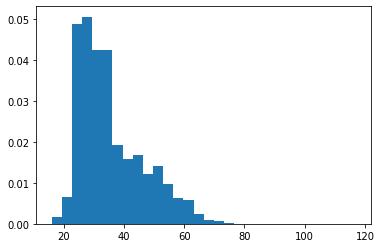

In [11]:
# visualize the data

sns.boxplot(x=df['age'])
plt.show()
plt.hist(df['age'], density=True, bins=30)
plt.show()

## positively skewed data.This makes sense as users will hit a point were they are old enough 
## to use the bikes majority will sit around 20-40 years old then slowly taper off

Customers(%): 24
Subsribers(%): 76


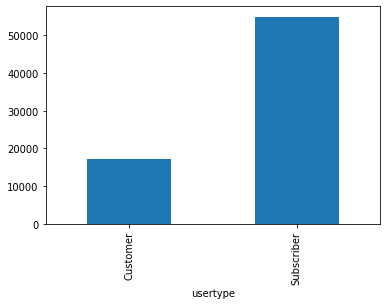

In [19]:
## Proportion of users that are either subsribers or customers

all_users = (df['usertype'].count())
customers = (df[df['usertype']=='Customer']).shape[0]
subscribers = (df[df['usertype']=='Subscriber']).shape[0]

customer_perc = ((customers/all_users) * 100)
subs_perc = ((subscribers/all_users) *100)

print(f"Customers(%): {round(customer_perc)}\nSubsribers(%): {round(subs_perc)}")

df.groupby('usertype')['trip_id'].count().plot.bar()
plt.show()

C:\Users\tberv\AppData\Local\Temp\ipykernel_20372\67463688.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_traffic = from_station.append(to_station)


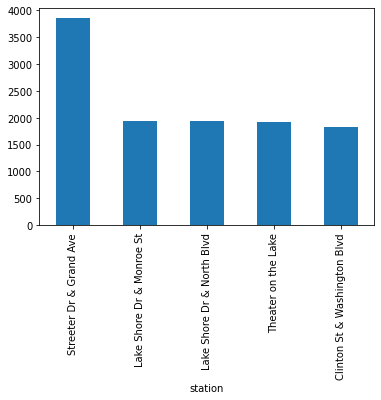

In [13]:
## Most popular stations

# creating 1 column to count every station visit, either dropping off or picking up
from_station = df[['from_station_name','usertype']]
from_station.columns = ['station','usertype']

to_station = df[['to_station_name','usertype']]
to_station.columns = ['station','usertype']

overall_traffic = from_station.append(to_station)
overall_traffic = overall_traffic.groupby('station')['usertype'].count().sort_values(ascending=False).head()
overall_traffic.plot.bar()
plt.show()

In [18]:
same_station = df.query('from_station_name == to_station_name').shape[0]

print(round(same_station/df.shape[0] * 100,2))

# approx 3% use the bikes likely for liusure 

3.39

In [15]:
same_stop = df.query('from_station_name == to_station_name')
print('Same stop riders avg duration: ', same_stop.tripduration.mean())
diff_stop = df.query('from_station_name != to_station_name')
print('Different stop riders avg duration: ', diff_stop.tripduration.mean())

Same stop riders avg duration:  38.56986497545008
Different stop riders avg duration:  15.791846398897931


In [16]:
## find the most popular times 

#convert columns into datetimes so we can manipulate easier
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

df['month'] = df.starttime.dt.month
df['day'] =df.starttime.dt.day_name()
df['time'] = df.starttime.dt.hour

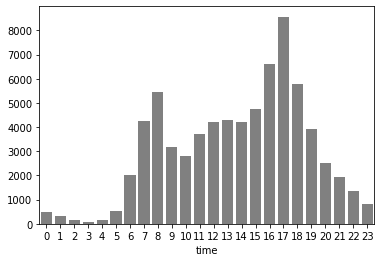

In [17]:
## Popular hours

popular_times = df.groupby('time')['trip_id'].count()
sns.barplot(x=popular_times.index , y= popular_times.values, color='gray')
plt.show()

# peaks around 8 and 5, people commuting to work.

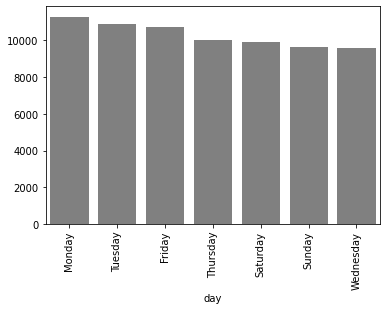

In [32]:
# Popular days

popular_days = df.groupby('day')['trip_id'].count().sort_values(ascending=False)

plt.xticks(rotation=90)
sns.barplot(x=popular_days.index , y= popular_days.values, color='gray')
plt.show()

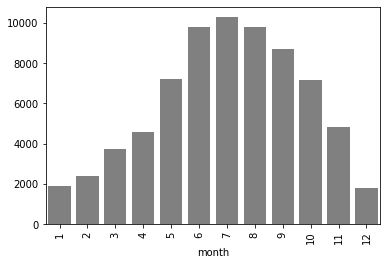

In [36]:
## Popular Months

popular_months = df.groupby('month')['trip_id'].count()
plt.xticks(rotation=90)
sns.barplot(x=popular_months.index , y= popular_months.values, color='gray')
plt.show()

# peaks around July, during summer in Chicago.
